# Simulation of AES S-Box
Student:Sukhsagar 

Advisor: Dr. Utsav Banerjee

Project:Implementation of Quantum Circuits for Cryptanalysis and Signal Processing Applications

In [1]:
import numpy as np

#Importing standard Qiskit libraries
from qiskit import QuantumCircuit,transpile,Aer,IBMQ,QuantumRegister,ClassicalRegister,execute
from qiskit.tools.jupyter import*
from qiskit.visualization import*
#from ibm_quantum_widgets import*
from qiskit.providers.aer import QasmSimulator

#Loading your IBM Quantum account(s)
#provider=IBMQ.load_account()
backend=Aer.get_backend('qasm_simulator')

## Function for Binary to Hexadecimal conversion 

In [2]:
# Function to convert Binary to Hexadecimal
def binToHexa(n):
    # convert binary to int
    num = int(n, 2)  
    # convert int to hexadecimal
    hex_num = hex(num)
    return(hex_num)

#Function to convert Hex to binary
def bin_format(integer, length):
    return f'{integer:0>{length}b}'

## Quantum Circuit for Isomorphic mapping $\Phi : GF(2^8)\rightarrow GF((2^4)^2)$ 

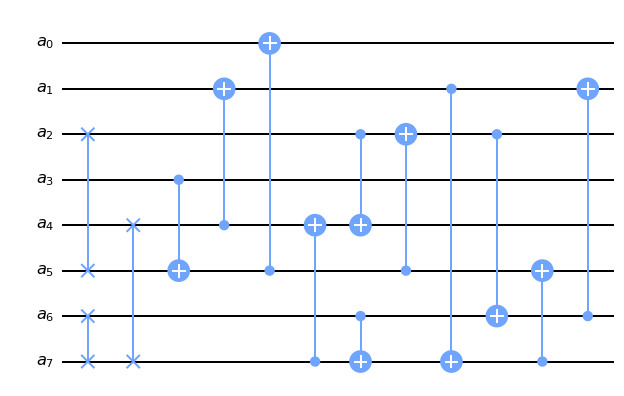

In [3]:
a=QuantumRegister(8,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for phi
qc.swap(6,7)
qc.swap(4,7)
qc.swap(2,5)
qc.cx([3,4,7,2,5,6,5,2,1,6,7],[5,1,4,4,0,7,2,6,7,1,5])
phi=qc.to_gate(label='phi')  
qc.draw('mpl')

## Quantum circuit for scaled-Squaring $U_{S.\lambda} : U_{S.\lambda}a \rightarrow \lambda.a^2$ 

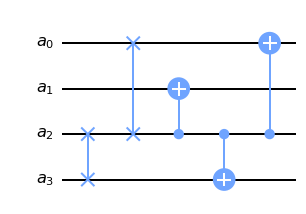

In [4]:
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for scaled-square
qc.swap(2,3)
qc.swap(0,2)
qc.cx([2,2,2],[1,3,0])
sl=qc.to_gate(label='$square.\lambda$')  
sl_inv=qc.inverse().to_gate(label='$(square.\lambda)^{\dag}$')
qc.draw('mpl')

## Quantum Circuit for Multiplicative inverse in $GF(2^4): a \rightarrow a^{-1}$ 

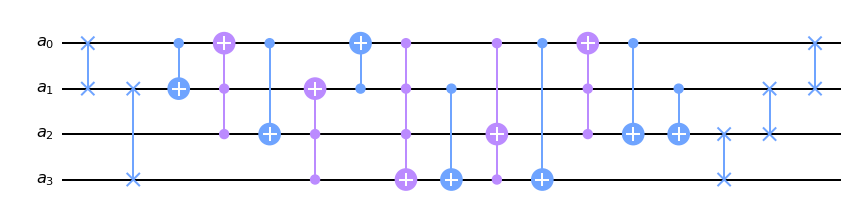

In [5]:
a=QuantumRegister(4,name='a')#Input register
qc=QuantumCircuit(a) 
# circuit for Multiplicative inverse
qc.swap(0,1)
qc.swap(1,3)
qc.cx(0,1)
qc.ccx(1,2,0)
qc.cx(0,2)
qc.ccx(3,2,1)
qc.cx(1,0)
qc.mcx([0,1,2],3)
qc.cx(1,3)
qc.ccx(0,3,2)
qc.cx(0,3)
qc.ccx(1,2,0)
qc.cx(0,2)
qc.cx(1,2)

qc.swap(3,2)
qc.swap(2,1)
qc.swap(1,0)

MI=qc.to_gate(label='MI')  
qc.draw('mpl')

## Quantum Circuit for Multplication of two variables in $GF(2^4)$ $| a \rangle | b \rangle| 0 \rangle\rightarrow | a \rangle | b \rangle| c=ab \rangle$

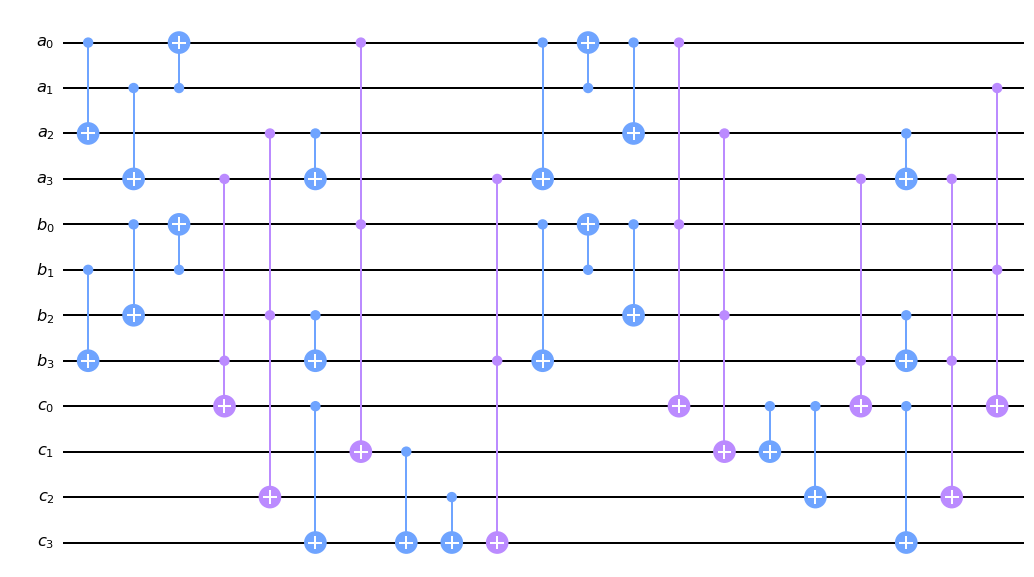

In [8]:
a=QuantumRegister(4,name='a') #Input register
b=QuantumRegister(4,name='b') #Input register
c=QuantumRegister(4,name='c') #output resiger
qc=QuantumCircuit(a,b,c)    
# circuit for Multiplication
qc.cx([0,1,1,4,5,5],[2,3,0,6,7,4])
qc.ccx(3,7,8)
qc.cx(8,11)
qc.ccx(0,4,9)
qc.ccx(2,6,10)
qc.cx([2,6,9,10],[3,7,11,11])
qc.ccx(3,7,11)
qc.cx([0,1,0,4,5,4],[3,0,2,7,4,6])
qc.ccx(0,4,8)
qc.ccx(2,6,9)
qc.cx(8,9)
qc.cx(8,10)
qc.ccx(3,7,8)
qc.cx([2,6,8],[3,7,11])
qc.ccx(3,7,10)
qc.ccx(1,5,8)
#qc.barrier()
Mul=qc.to_gate(label='Mult')  
qc.draw('mpl')

## Quantum Circuit for $\Phi ^{-1}:  GF((2^4)^2) \rightarrow GF(2^8)$

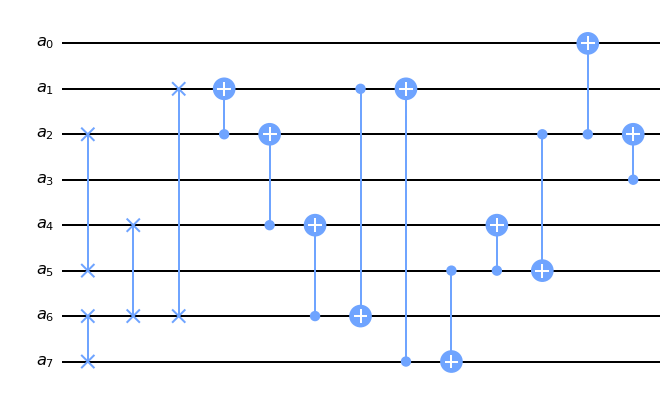

In [9]:
a=QuantumRegister(8,name='a')#Input register
qc=QuantumCircuit(a) 

qc.swap(6,7)
qc.swap(4,6)
qc.swap(2,5)
qc.swap(1,6)
qc.cx([2,4,6,1,7,5,5,2,2,3],[1,2,4,6,1,7,4,5,0,2])
phi_inv=qc.to_gate(label='phi_inv')  
qc.draw('mpl')

## Quantum Circuit for $M.\phi^{-1}$

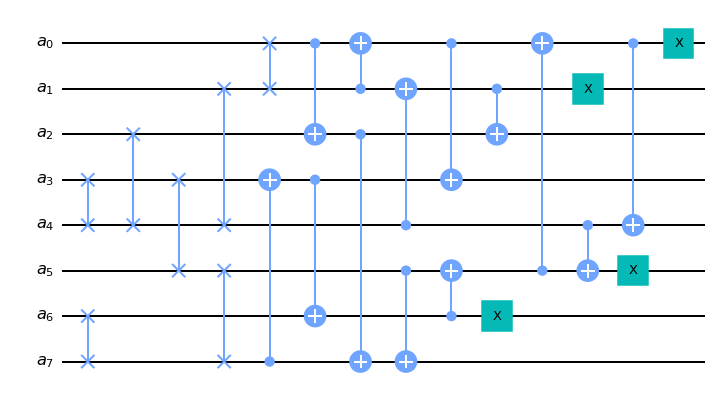

In [10]:

a=QuantumRegister(8,name='a')#Input register
qc=QuantumCircuit(a) 
qc.swap(3,4)
qc.swap(2,4)
qc.swap(3,5)
qc.swap(1,4)
qc.swap(6,7)
qc.swap(5,7)
qc.swap(0,1)
qc.cx([7,3,0,1,2,5,4,0,6,5,4,1,0],[3,6,2,0,7,7,1,3,5,0,5,2,4])
qc.x([0,1,5,6])
M=qc.to_gate(label='Affine')
qc.draw('mpl')

## Quantum Circuit for S-BOX (C1: $| a \rangle | 0 \rangle\rightarrow | a \rangle | s(a) \rangle$)

### S-Box look table: substitution values for the byte xy (in hexadecimal format).

In [11]:
 sb =[
   0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
   0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
   0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
   0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
   0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
   0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
   0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
   0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
   0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
   0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
   0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
   0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
   0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
   0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
   0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
   0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
 ]

In [12]:
#Complete circuit 
def sboxtest(inp):
    a=QuantumRegister(4,name='a')#Input register
    b=QuantumRegister(4,name='b')
    e=QuantumRegister(4,name='e') #Ancilla
    c=QuantumRegister(4,name='c')#Output register
    d=QuantumRegister(4,name='d')
    cr=ClassicalRegister(8,name='cr')
    #ar=ClassicalRegister(4,name='ar')
    ckt=QuantumCircuit(a,b,e,c,d,cr) 
    #--------------Encode input-----
    
    for i in range(len(inp)):
        if inp[i]=='1':
            ckt.x(7-i)        
    ckt.barrier()
    #--------------------------------
    ckt.append(phi,list(np.arange(8)))
    ckt.barrier()
    ckt.cx(a,b)
    ckt.append(Mul,list(np.arange(12)))
    ckt.barrier()
    ckt.cx(a,b)
    ckt.barrier()
    ckt.append(sl,b[:])
    ckt.cx(b,e)
    ckt.barrier()
    ckt.append(sl_inv,b[:])
    ckt.append(MI,e)
    ckt.barrier()
    ckt.append(Mul,b[:]+e[:]+d[:])
    ckt.append(Mul,a[:]+e[:]+c[:])
    ckt.barrier()
    ckt.cx(d,c)
    #---------Circuit for cleaning of Ancilla-------
    ckt.barrier()
    ckt.append(phi_inv,a[:]+b[:])
    ckt.cx(c,d)
    ckt.append(Mul,d[:]+c[:]+e[:])
    ckt.cx(c,d)
    ckt.append(sl,d[:])
    ckt.cx(d,e)
    ckt.append(sl_inv,d[:])
    ckt.barrier()

    ckt.append(M,c[:]+d[:])
    ckt.measure(c[:]+d[:],cr)
    #ckt.measure(c[:]+d[:]+e[:]+a[:]+b[:],cr)
    #ckt.draw()
    job=execute(ckt,backend, shots=500)
    result=job.result().get_counts()
    return(result)

In [59]:
#Calculating result for all input 
y=[]
for i in range(256):
    inp=format(i,'08b')  #8 bit binary format
    result=sboxtest(inp)
    #print(inp,result)
    for key in result.keys():
        y.append(binToHexa(key))
print(y)

['0x63', '0x7c', '0x77', '0x7b', '0xf2', '0x6b', '0x6f', '0xc5', '0x30', '0x1', '0x67', '0x2b', '0xfe', '0xd7', '0xab', '0x76', '0xca', '0x82', '0xc9', '0x7d', '0xfa', '0x59', '0x47', '0xf0', '0xad', '0xd4', '0xa2', '0xaf', '0x9c', '0xa4', '0x72', '0xc0', '0xb7', '0xfd', '0x93', '0x26', '0x36', '0x3f', '0xf7', '0xcc', '0x34', '0xa5', '0xe5', '0xf1', '0x71', '0xd8', '0x31', '0x15', '0x4', '0xc7', '0x23', '0xc3', '0x18', '0x96', '0x5', '0x9a', '0x7', '0x12', '0x80', '0xe2', '0xeb', '0x27', '0xb2', '0x75', '0x9', '0x83', '0x2c', '0x1a', '0x1b', '0x6e', '0x5a', '0xa0', '0x52', '0x3b', '0xd6', '0xb3', '0x29', '0xe3', '0x2f', '0x84', '0x53', '0xd1', '0x0', '0xed', '0x20', '0xfc', '0xb1', '0x5b', '0x6a', '0xcb', '0xbe', '0x39', '0x4a', '0x4c', '0x58', '0xcf', '0xd0', '0xef', '0xaa', '0xfb', '0x43', '0x4d', '0x33', '0x85', '0x45', '0xf9', '0x2', '0x7f', '0x50', '0x3c', '0x9f', '0xa8', '0x51', '0xa3', '0x40', '0x8f', '0x92', '0x9d', '0x38', '0xf5', '0xbc', '0xb6', '0xda', '0x21', '0x10', '0xff'

In [60]:
#Testing function 
cnt=[]
for i in range(len(y)):
    if(y[i]==str(hex(sb[i]))):
        cnt.append(1)
    else:
        cnt.append(0)
print('passing score: {} %'.format(sum(cnt)*100/len(cnt)))

passing score: 100.0 %
